# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Labelled_Manual_DBSCAN_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,-1,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,-1,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,-1,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,3,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,-1,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,4,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,5,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(42797, 6)

<Axes: ylabel='Type 1'>

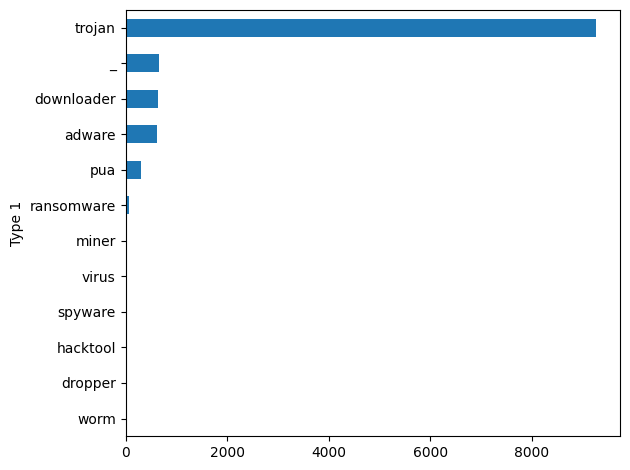

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

In [4]:
#Inject pattern (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#Drop row that is falsely labelled. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

display(malicious_df['cluster'].unique())

array([  0,   1,   2,  -1,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  14,  15,  16,  17,  18,  19,  13,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  99, 100, 101, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 102,
       148, 149, 150, 139, 151, 152, 153, 154, 155, 156, 157, 160, 161,
       163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 18

## "What Malware Types can be found in the dataset?"

How many instances of a certain malware type are there in the entire dataset per Type # (indicating popularity) as specified by VirusTotal (VT)?

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [5]:
output = malicious_df['Type 1'].value_counts()

In [6]:
str_output = ""
str_output += str() + "\n\n"
# str_output += str(malicious_df['Type 2'].value_counts()) + "\n\n"
# str_output += str(malicious_df['Type 3'].value_counts()) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()

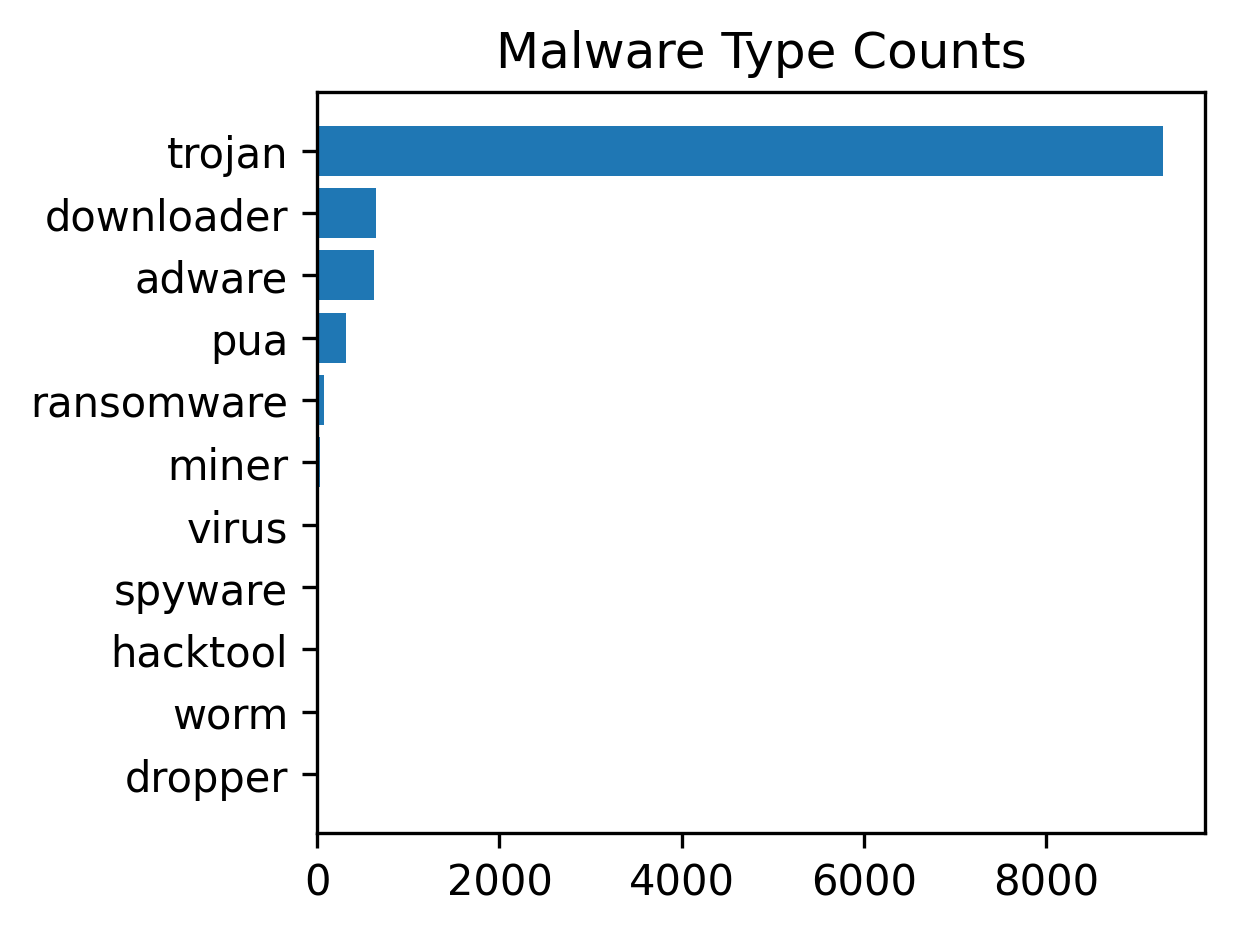

In [7]:
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## "What Malware Types are there in each cluster?"

This indicates what are the individual malware types mostly associated to cluster in terms of quantity regardless of order by popularity by VT.

Note that order matters as the first ones are the most popular labels as indicated by VT.

In [8]:
#DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

array(['trojan', 'pua', 'downloader', 'adware', 'hacktool', 'miner',
       'virus', 'spyware', 'ransomware', 'worm', 'dropper'], dtype=object)

In [9]:
# # DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT
# unique_clusters = get_unique_clusters(malicious_df)
# for u in unique_clusters:
#     if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
#         malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

In [10]:
#Identify the overall list of types each cluster is as designated by VirusTotal.
unique_clusters = get_unique_clusters(malicious_df)

summary = []

for u in unique_clusters:
    cluster_sublist = [u]
    df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
    idx = list(df_copy['Type 1'].value_counts().index)
    counts = list(df_copy['Type 1'].value_counts())
    type_sublist = []
    for i in range(len(idx)):
        type_sublist.append([idx[i], counts[i]])
    cluster_sublist.append(type_sublist)
    # str_summary = []
    # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
    # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
    summary.append(cluster_sublist)

### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [11]:
str_output = ""
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 0: trojan (820); spyware (1); adware (1); 
CLUSTER 1: trojan (19); pua (18); downloader (4); adware (3); 
CLUSTER 2: trojan (3); 
CLUSTER -1: trojan (2853); adware (196); pua (88); downloader (37); virus (15); miner (14); ransomware (10); hacktool (5); spyware (1); worm (1); 
CLUSTER 3: downloader (23); trojan (10); adware (7); virus (1); 
CLUSTER 4: trojan (96); adware (15); pua (1); 
CLUSTER 5: downloader (237); adware (15); trojan (7); pua (2); 
CLUSTER 6: trojan (4); adware (3); hacktool (1); downloader (1); 
CLUSTER 7: trojan (5); 
CLUSTER 8: trojan (92); 
CLUSTER 9: trojan (9); 
CLUSTER 10: trojan (6); 
CLUSTER 11: trojan (180); adware (2); pua (1); 
CLUSTER 12: trojan (131); adware (9); pua (2); 
CLUSTER 14: trojan (254); adware (2); spyware (1); 
CLUSTER 15: trojan (11); 
CLUSTER 16: trojan (123); downloader (1); 
CLUSTER 17: trojan (18); downloader (13); adware (6); pua (2); 
CLUSTER 18: trojan (22); 
CLUSTER 19: trojan (35); pua (2); 
CLUSTER 13: downloader (33); troj

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [12]:
str_output = ""

# Summarize Clusters that have the same malware types as per VirusTotal.
str_output += f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 11

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 494
Matching Clusters: [0, 2, -1, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 20, 21, 22, 23, 17, 24, 25, 27, 28, 4, 29, 30, 32, 33, 34, 35, 36, 37, 38, 1, 39, 41, 42, 44, 45, 46, 47, 48, 49, 51, 53, 31, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 19, 84, 85, 87, 88, 89, 90, 54, 91, 93, 94, 95, 96, 97, 99, 103, 104, 105, 106, 107, 109, 110, 112, 115, 116, 117, 120, 124, 125, 127, 128, 129, 130, 132, 133, 135, 136, 140, 141, 142, 143, 144, 145, 146, 102, 131, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 161, 13, 163, 164, 165, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 181, 182, 183, 184, 179, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 209, 210, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 230, 231, 232, 236, 237, 238, 239, 240, 241, 242, 243

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
10,trojan,494,"[0, 2, -1, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18..."
8,adware,103,"[-1, 4, 31, 50, 13, 83, 86, 108, 121, 134, 138..."
7,pua,65,"[1, -1, 19, 26, 54, 55, 66, 17, 92, 113, 114, ..."
9,downloader,34,"[3, 5, 17, -1, 13, 43, 63, 82, 108, 111, 119, ..."
5,miner,8,"[-1, 137, 62, 27, 420, 123, 502, 326]"
3,spyware,6,"[57, 0, 14, 104, -1, 522]"
6,ransomware,6,"[100, 101, 96, -1, 266, 329]"
2,hacktool,4,"[6, -1, 354, 348]"
4,virus,4,"[52, -1, 3, 54]"
0,worm,1,[-1]


The use of clustering stops only to assumptions only the entire dataset.

The remaining individual samples from the dataset cannot be ascertained with a specific malware type due to the clustering itself being not absolute/conclusive (take `trojan` and `adware` having clusters 3,12,13 as an example).


## Determine the API Calls in each Malware Type

This is limited by the verified malicious samples and may not be representative of the entire dataset (i.e., some API calls may be missing not available)

In [13]:
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

In [14]:
malware_types = count_summary['Malware Type'].to_list()

pd.set_option("display.max_rows", None)

print("API CALL QUANTITY PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    display(ser.value_counts())

API CALL QUANTITY PER MALWARE TYPE


trojan
LdrGetProcedureAddress               152693
LdrLoadDll                            90855
LdrGetDllHandle                       60885
RegOpenKeyExW                         57657
LoadResource                          47612
FindResourceExW                       46373
NtClose                               44716
RegQueryValueExW                      41061
RegCloseKey                           36822
NtAllocateVirtualMemory               34979
NtQueryValueKey                       22190
NtOpenKey                             21667
GetSystemMetrics                      19594
GetSystemTimeAsFileTime               16978
SetErrorMode                          10042
GetSystemInfo                          8867
NtProtectVirtualMemory                 7717
RegQueryInfoKeyW                       7066
NtDelayExecution                       7007
NtCreateFile                           6613
NtFreeVirtualMemory                    6472
DrawTextExW                            6346
RegOpenKeyExA            

adware
LdrGetProcedureAddress               10869
LdrLoadDll                            6260
LdrGetDllHandle                       5404
NtClose                               3749
NtAllocateVirtualMemory               3030
RegOpenKeyExW                         2952
RegCloseKey                           2946
RegQueryValueExW                      2080
SetErrorMode                          1908
NtOpenKey                             1500
NtQueryValueKey                       1368
NtCreateFile                           976
LoadResource                           975
GetSystemWindowsDirectoryW             926
GetSystemDirectoryW                    831
FindResourceExW                        823
NtMapViewOfSection                     811
GetSystemTimeAsFileTime                795
GetSystemMetrics                       775
NtFreeVirtualMemory                    721
RegOpenKeyExA                          705
NtReadFile                             617
NtCreateSection                        613
GetS

pua
LdrGetProcedureAddress               5643
LdrLoadDll                           3184
LdrGetDllHandle                      2803
NtClose                              1993
NtAllocateVirtualMemory              1597
RegOpenKeyExW                        1425
RegCloseKey                          1202
RegQueryValueExW                      927
SetErrorMode                          786
NtOpenKey                             768
NtQueryValueKey                       707
NtReadFile                            608
SetFilePointer                        603
GetSystemMetrics                      561
NtCreateFile                          490
NtFreeVirtualMemory                   403
GetSystemDirectoryW                   396
NtMapViewOfSection                    393
GetSystemWindowsDirectoryW            389
LoadResource                          381
FindResourceExW                       370
GetSystemTimeAsFileTime               323
NtProtectVirtualMemory                307
NtCreateSection               

downloader
LdrGetProcedureAddress               16652
LdrGetDllHandle                      10485
LdrLoadDll                            5471
RegCloseKey                           4226
RegOpenKeyExW                         3769
NtAllocateVirtualMemory               2953
RegQueryValueExW                      2893
NtClose                               2624
FindResourceExW                       1275
LoadResource                          1270
RegOpenKeyExA                         1060
GetSystemTimeAsFileTime                848
NtOpenKey                              797
NtQueryValueKey                        733
RegQueryValueExA                       695
NtFreeVirtualMemory                    683
GetSystemWindowsDirectoryW             678
GetSystemMetrics                       568
NtMapViewOfSection                     508
SetErrorMode                           467
NtCreateFile                           421
GetSystemDirectoryW                    393
SetUnhandledExceptionFilter            370


miner
LdrGetProcedureAddress            326
NtClose                           278
NtQueryAttributesFile             177
LdrLoadDll                        177
LdrGetDllHandle                   176
NtCreateFile                      158
NtMapViewOfSection                135
NtCreateSection                   129
RegOpenKeyExW                     128
NtUnmapViewOfSection              117
NtAllocateVirtualMemory           109
RegCloseKey                       108
NtReadFile                        101
SetFilePointer                    101
RegQueryValueExW                   90
LdrUnloadDll                       71
GetSystemTimeAsFileTime            63
GetSystemWindowsDirectoryW         62
NtOpenKey                          62
FindResourceExW                    55
LoadResource                       54
GetSystemInfo                      52
GetSystemDirectoryW                52
NtQueryValueKey                    50
WSAStartup                         32
socket                             30
SetErr

spyware
LdrGetProcedureAddress        206
FindResourceExW               160
LoadResource                  144
LdrGetDllHandle               108
LdrLoadDll                    103
NtClose                        61
GetSystemMetrics               52
NtAllocateVirtualMemory        48
RegCloseKey                    47
LoadStringA                    31
RegOpenKeyExW                  26
NtQueryValueKey                25
NtOpenKey                      24
RegOpenKeyExA                  24
DrawTextExW                    17
RegQueryValueExA               14
NtCreateFile                   14
NtCreateSection                14
RegQueryValueExW               14
GetSystemInfo                  13
NtMapViewOfSection             12
FindResourceA                  11
GetSystemDirectoryW            11
GetSystemWindowsDirectoryW     11
NtQueryAttributesFile          10
RegCreateKeyExA                10
RegQueryInfoKeyW               10
FindResourceExA                 9
NtFreeVirtualMemory             9
GetSys

ransomware
NtQuerySystemInformation      1753
NtAllocateVirtualMemory       1223
NtFreeVirtualMemory           1089
NtClose                        504
LdrGetProcedureAddress         317
RegOpenKeyExW                  254
RegCloseKey                    253
RegQueryValueExW               251
NtOpenKey                      172
NtCreateFile                   160
LdrLoadDll                     159
NtQueryValueKey                156
LdrGetDllHandle                153
NtCreateSection                139
NtMapViewOfSection             139
CreateThread                    98
NtOpenFile                      78
NtQueryInformationFile          74
NtCreateMutant                  73
GetSystemWindowsDirectoryW      73
CryptAcquireContextW            72
NtDelayExecution                71
GetFileSize                     69
GetTempPathW                    69
CreateToolhelp32Snapshot        57
Process32FirstW                 52
Process32NextW                  52
GetFileAttributesW              19
SetFileTi

hacktool
NtClose                        98
LdrGetProcedureAddress         83
LdrLoadDll                     55
NtAllocateVirtualMemory        41
LdrGetDllHandle                37
FindFirstFileExW               33
NtCreateFile                   29
RegCloseKey                    27
RegOpenKeyExW                  22
NtQueryValueKey                21
GetSystemMetrics               20
NtOpenKey                      19
SetFilePointer                 18
NtReadFile                     17
RegQueryValueExW               17
NtMapViewOfSection             15
GetSystemDirectoryW            15
NtFreeVirtualMemory            14
LoadResource                   13
SetErrorMode                   12
RegOpenKeyExA                  11
NtCreateSection                11
GetSystemWindowsDirectoryW     10
NtOpenFile                      8
NtWriteFile                     8
NtQueryAttributesFile           8
RegCreateKeyExA                 6
GetSystemTimeAsFileTime         6
DeviceIoControl                 6
FindR

virus
LdrGetProcedureAddress               268
LdrLoadDll                           174
NtReadFile                           130
RegCloseKey                          128
RegOpenKeyExW                         93
NtWriteFile                           89
NtClose                               87
LdrGetDllHandle                       78
RegQueryValueExW                      71
NtAllocateVirtualMemory               64
SetFilePointer                        50
RegOpenKeyExA                         40
NtOpenKey                             35
NtCreateFile                          33
NtQueryValueKey                       31
FindResourceExW                       26
LoadResource                          24
NtFreeVirtualMemory                   19
GetSystemWindowsDirectoryW            19
RegSetValueExA                        18
NtOpenKeyEx                           17
NtMapViewOfSection                    17
GetSystemTimeAsFileTime               13
NtSetValueKey                         13
SetErrorMo

worm
LdrGetProcedureAddress         23
LdrGetDllHandle                20
NtAllocateVirtualMemory         5
NtClose                         5
RegOpenKeyExW                   5
RegCloseKey                     5
CreateThread                    4
NtDuplicateObject               4
RegQueryValueExW                4
NtQueryValueKey                 4
NtOpenKey                       4
LdrLoadDll                      3
GetSystemTimeAsFileTime         2
RegOpenKeyExA                   1
NtQuerySystemInformation        1
SetUnhandledExceptionFilter     1
GlobalMemoryStatusEx            1
NtFreeVirtualMemory             1
NtCreateThreadEx                1
NtResumeThread                  1
GetSystemDirectoryW             1
GetFileVersionInfoSizeW         1
GetFileVersionInfoW             1
GetTempPathW                    1
RegQueryValueExA                1
Name: count, dtype: int64

dropper
SetErrorMode                  16
LdrLoadDll                    16
LdrGetProcedureAddress         9
RegOpenKeyExW                  6
NtClose                        6
LdrGetDllHandle                6
RegQueryValueExW               5
RegCloseKey                    5
NtAllocateVirtualMemory        4
NtCreateFile                   3
NtQueryAttributesFile          3
GetSystemWindowsDirectoryW     3
GetSystemDirectoryW            3
NtMapViewOfSection             2
NtOpenKey                      2
NtQueryValueKey                2
NtCreateSection                2
LoadStringW                    2
GetSystemInfo                  1
GetNativeSystemInfo            1
NtCreateMutant                 1
NtFreeVirtualMemory            1
GetSystemTimeAsFileTime        1
Name: count, dtype: int64

While the API Calls on each malware type above may be lacking in some degree, the following must be noted into consideration:

1. The API Calls were obtained from samples whose hashes were verified which is only 3% of the entire dataset. While statistically representative of the entire dataset, the clusterization of the dataset cannot be used as a ground truth for the malware types of all malicious-labelled samples (what about those samples that are falsely-labelled).

2. The author of the dataset only included the first 100 API Calls per sample which may indicate that not all expected API Calls may not have been captured and that only the prelude API Calls were only captured.

## Some Notable API Calls in each Malware Type
*You may add more in the write-up or paper.*

**trojan**

A type of malware that downloads onto a computer disguised as a legitimate program.

*This malware type is quite tricky as the API Calls may be made by  the legitimate process (i.e., pretending process) or the malicious process (i.e., underlying process).*

- GetSystemTimeAsFileTime, GetSystemMetrics, GetSystemInfo, GetSystemDirectory, GetSystemWindowsDirectory, GetNativeSystemInfo, GetTimeZoneInformation, GetComputerNameW, GetAdaptersInfo, LookupAccountSidW: 

	- Checks for system parameters, configuration, and environment.

- NtFreeVirtualMemory, NtAllocateVirtualMemory, NtProtectVirtualMemory: 

	- Possible attempts to protect/hide its process stored in the virtual memory (either the legit or malicious process).

- RegEnumKeyW, RegQueryInfoKeyW, RegQueryValueExW, RegCreateKeyExW, RegCreateKeyExA, RegOpenKeyExA, RegOpenKeyExW, RegCloseKey: 

	- Checks, creates/modifies registry key and values.

- socket, InternetOpenA, InternetSetOptionA, InternetConnectA, HttpOpenRequestA, closesocket:

	- Possible attempts to establish network/internet connection(s).

- CryptHashData, CryptCreateHash:

	- Possible attempts to create hash object(s) and hashed data.

- DrawTextExW, DrawTextExA, GetCursorPos

	- Use of GUI elements.

-  CreateThread, NTResumeThread, NtCreateThreadEx, NtSuspendThread, NtOpenThread

	- Possible indication of creating a child process (either as the legitimate or malicious process).

**adware**

A type of malicious software that secretly installs itself on your device and displays unwanted advertisements and pop-ups.

*Behavior not any different to trojan (more specifically its non-malicious actions) as adwares are a `grayware` which while not dangerous can be annoying.*

**downloader**

Secretly downloads malicious files from a remote server, then installs and executes the files.

*Supringsingly, there are no network-related API Calls found in the list. However, it is possible that the samples on this malware type may have opted to use a child process instead for downloading the payload.*

- NtOpenProcess, NtCreateSection, NtOpenSection

	- Possible attempts to create a child process for downloading the payload.

- GetSystemFileAsFileTime, SetFilePointer,  NtWriteFile,  GetFileSize, NtReadFile:

	- Possible attempts to write and read files.

**pua**

Potentially Unwanted Applications (PUAs) are unwanted software programs that come bundled in legitimate free software programs as a package.

*Similar to adware, behavior not any different to trojan (more specifically its non-malicious actions) & adware as puas are a `grayware` which while not dangerous can be annoying.*

**miner**

A form of malware that hides on your device and steals its computing resources in order to mine for valuable online currencies like Bitcoin.

- GetSystemInfo

	- Possible attempts to determine system capability for mining.

- NtCreateFile, SetFilePointer, 

	- Possible attempts to writing outputs of cryptomining activity.

- WSAStartup, socket, closesocket

	- Possible attempts to establish connection to C&C

**ransomware**

A type of malware that prevents or limits users from accessing their system, either by locking the system's screen or by locking the users' files until a ransom is paid.

- NtQuerySystemInformation: 

	- Possible attempts to determine policy information which could determine access to files/directories.

- CreateThread: 

	- Possible attempts create child processes, whether for expediting encryption, interfacing with victim, or contacting C&C.

- CryptAcquireContextW: 

	- Possible attemptes to obtaining handle on CryptoAPI calls.

- NtOpenFile, NtCreateFile: 

	- Possible attempts in opening and reading file for encryption.

	- Possible attempts in leaving ransom artifacts (e.g., ransomnotes, encrypted files).

- NtDelayExecution: 

	- Possible attempts at suspending other applications that are using a file which may invervene with its encryption task.

**virus**

A specific type of malware that self-replicates by inserting its code into other programs.

*No notable API Calls, eccept on registry and file/memory related API Calls.*

**hacktool**

Used to create new users in the list of permitted system visitors, and to delete information from system logs in order to hide the malicious user's presence on the system. 
It can be used to "crack" or patch unregistered copies of legitimate software.

- GetSystemMetrics:

	- Possible attempts in determining system metrics and configuration settings.

- IsDebuggerPresent:

	- Possible attempts in determinig if it is being run on a debugger to avoid proceeding further.

- DeleteFileW, NtCreateFile, NtWriteFile

	- Possible attempts in deleting and replacing license related files on systems.

**dropper**

A kind of Trojan that has been designed to "install" malware (virus, backdoor, etc.) to a computer

*Supringsingly, there are no network-related API Calls found in the list.*

